In [432]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [442]:
# Заданные значения id и jd
id = 100
jd = 100

# Заданные начальные значения
w = np.zeros((id + 1, jd + 1))
c = np.zeros(id + 1)
a = np.zeros(id + 1)
cv = np.zeros(id + 1)
G = np.zeros((id + 1, jd + 1))

# Заданные значения
Mah = 0.

dr = 3.0 / id
dtt = math.atan(1.0) * 4.0 / jd
r = np.linspace(1, 4, id + 1)
theta = np.zeros(jd + 1)

# Заполнение массивов
for i in range(id + 1):
    a[i] = 0.5 / (r[i] * dr)
    c[i] = (dr / (r[i] * dtt))**2
    cv[i] = 0.5 / (r[i] * dtt)

for j in range (0, jd + 1):
    theta[j] = j * dtt
    
cu = 0.5 / dr

# Заполнение массива w
for j in range(jd + 1):
    costt = math.cos(theta[j])
    for i in range(id + 1):
        w[i, j] = (r[i] + 1.0 / r[i]) * costt

In [443]:
def Plot(r, theta, Phi):
    fig = plt.figure(figsize=(10, 10))
    R, Theta = np.meshgrid(r, theta)
    ax = fig.add_subplot(111)
    c = ax.pcolormesh(R, Theta, Phi, cmap='viridis')
    plt.colorbar(c, ax=ax, label='')
    plt.xlabel('r', fontsize=18)
    plt.ylabel("theta", fontsize=18)
    plt.title("Phi", fontsize=18)
    plt.show()

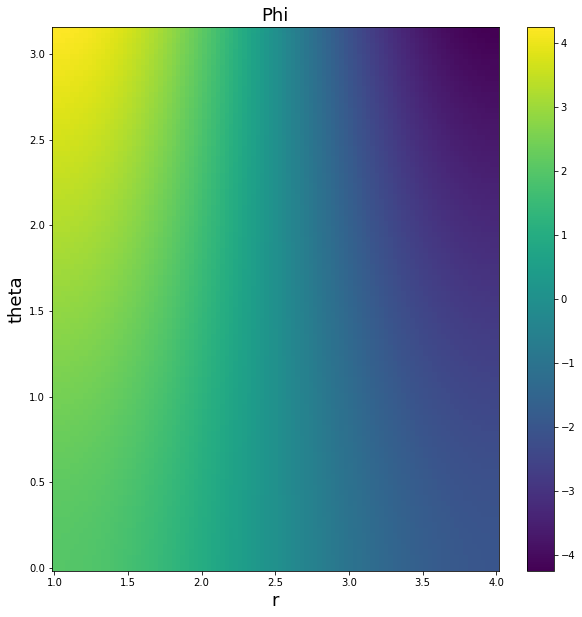

In [444]:
Plot(r, theta, w)

In [445]:
# Подпрограмма для вычисления скоростей и плотности
def uvp(w):
    u = np.zeros((id + 1, jd + 1))
    v = np.zeros((id + 1, jd + 1))
    p = np.ones((id + 1, jd + 1))
    cMM = Mah * Mah * 0.2
    for j in range(1, jd):
        for i in range(1, id):
            u[i, j] = (w[i + 1, j] - w[i - 1, j]) * cu
            v[i, j] = (w[i, j + 1] - w[i, j - 1]) * cv[i]
            VV = u[i, j]**2 + v[i, j]**2
            q = (1 - VV) * cMM + 1
            p[i, j] = np.sqrt(q) * q**2
        v[0, j] = v[1, j]
    for i in range(1, id):
        u[i, 0] = u[i, 1]
        u[i, jd] = u[i, jd - 1]
    return u, v, p

# Подпрограмма для вычисления коэффициентов
def coeff(w):
    B = np.zeros((id + 1, jd + 1))
    D = np.zeros((id + 1, jd + 1))
    oE = np.zeros((id + 1, jd + 1))
    F = np.zeros((id + 1, jd + 1))
    H = np.zeros((id + 1, jd + 1))
    u, v, p = uvp(w)
    for j in range(1, jd):
        for i in range(1, id):
            B[i, j] = (p[i, j - 1] + p[i, j]) * 0.5 * c[i]
            H[i, j] = (p[i, j] + p[i, j + 1]) * 0.5 * c[i]
            Pim = (p[i - 1, j] + p[i, j]) * 0.5
            Pip = (p[i, j] + p[i + 1, j]) * 0.5
            Eij = Pip + Pim + B[i, j] + H[i, j]
            aP = a[i] * p[i, j]
            F[i, j] = Pip + aP
            D[i, j] = Pim - aP
            oE[i, j] = 1.0 / Eij
    return B, D, oE, F, H

# Подпрограмма для вычисления потенциала
# def Wcal(w, B, D, F, H, oE):
#     ww = np.zeros((id + 1, jd + 1))

#     for j in range(1, jd):
#         for i in range(1, id):
#             ww[i, j] = (w[i, j - 1] * B[i, j] +
#                         w[i - 1, j] * D[i, j] +
#                         w[i + 1, j] * F[i, j] +
#                         w[i, j + 1] * H[i, j]) * oE[i, j]

#     for j in range(1, jd):
#         for i in range(1, id):
#             w[i, j] = ww[i, j]

#     for j in range(jd, 0, -1):
#         for i in range(id, 0, -1):
#             w[i, j] = ww[i, j]
#         w[0, j] = w[1, j]
            
#     for i in range(1, id):
#         w[i, 0] = w[i, 1]
#         w[i, jd] = w[i, jd - 1]

        
        
#     for j in range(jd, 0, -1):
#         for i in range(1, id):
#             w[i, j] = ww[i, j]
            
#     for j in range(1, jd):
#         for i in range(id, 0, -1):
#             w[i, j] = ww[i, j]
#         w[0, j] = w[1, j]
            
#     for i in range(1, id):
#         w[i, 0] = w[i, 1]
#         w[i, jd] = w[i, jd - 1]

#     return w


def Wcal(w, B, D, F, H, oE):
    for j in range(1, jd):
        for i in range(1, id):
            w[i, j] = (w[i, j - 1] * B[i, j] +
                        w[i - 1, j] * D[i, j] +
                        w[i + 1, j] * F[i, j] +
                        w[i, j + 1] * H[i, j]) * oE[i, j]
    for j in range(1, jd):
        for i in range(1, id):
            w[i, j] = (w[i, j - 1] * B[i, j] +
                        w[i - 1, j] * D[i, j] +
                        w[i + 1, j] * F[i, j] +
                        w[i, j + 1] * H[i, j]) * oE[i, j]
    for j in range(jd -1, 0, -1):
        for i in range(id - 1, 0, -1):
            w[i, j] = (w[i, j - 1] * B[i, j] +
                        w[i - 1, j] * D[i, j] +
                        w[i + 1, j] * F[i, j] +
                        w[i, j + 1] * H[i, j]) * oE[i, j]
        w[0, j] = w[1, j]
    for i in range(0, id):
        w[i, 0] = w[i, 1]
        w[i, jd] = w[i, jd - 1]
    for j in range(jd - 1, 0, -1):
        for i in range(1, id):
            w[i, j] = (w[i, j - 1] * B[i, j] +
                        w[i - 1, j] * D[i, j] +
                        w[i + 1, j] * F[i, j] +
                        w[i, j + 1] * H[i, j]) * oE[i, j]
    for j in range(1, jd):
        for i in range(id - 1, 1, -1):
            w[i, j] = w[i, j]
        w[0, j] = w[1, j]
    for i in range(1, id):
        w[i, 0] = w[i, 1]
        w[i, jd] = w[i, jd - 1]
    return w

def plot_u(u):
    R, Theta = np.meshgrid(r, theta)
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    c = ax.contourf(R, Theta, u.T, cmap='viridis')
    plt.colorbar(c, label='Скорость u')
    plt.title('График скорости u в полярных координатах')
    ax.set_xlabel('r', fontsize=18)
    ax.set_ylabel('theta', fontsize=18)
    plt.show()
    
def plot_v(u):
    R, Theta = np.meshgrid(r, theta)
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    c = ax.contourf(R, Theta, u.T, cmap='viridis')
    plt.colorbar(c, label='Скорость u')
    plt.title('График скорости v в полярных координатах')
    ax.set_xlabel('r', fontsize=18)
    ax.set_ylabel('theta', fontsize=18)
    plt.show()
    
    
def plot_p(v):
    R, Theta = np.meshgrid(r, theta)
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    c = ax.contourf(R, Theta, p.T, cmap='viridis')
    plt.colorbar(c, label='Плотность')
    plt.title('График плотности в полярных координатах')
    plt.show()

In [446]:
def uvp(w):
    u = np.zeros((id + 1, jd + 1))
    v = np.zeros((id + 1, jd + 1))
    p = np.ones((id + 1, jd + 1))
    cMM = Mah * Mah * 0.2
    for j in range(1, jd):
        for i in range(1, id):
            u[i, j] = (w[i + 1, j] - w[i - 1, j]) * cu
            v[i, j] = (w[i, j + 1] - w[i, j - 1]) * cv[i]
            VV = u[i, j]**2 + v[i, j]**2
            q = (1 - VV) * cMM + 1
            p[i, j] = np.sqrt(q) * q**2
        v[0, j] = v[1, j]
    for i in range(1, id):
        u[i, 0] = u[i, 1]
        u[i, jd] = u[i, jd - 1]
    return u, v, p

def coeff(w):
    B = np.zeros((id + 1, jd + 1))
    D = np.zeros((id + 1, jd + 1))
    oE = np.zeros((id + 1, jd + 1))
    F = np.zeros((id + 1, jd + 1))
    H = np.zeros((id + 1, jd + 1))
    u, v, p = uvp(w)
    for j in range(1, jd):
        for i in range(1, id):
            B[i, j] = (p[i, j - 1] + p[i, j]) * 0.5 * c[i]
            H[i, j] = (p[i, j] + p[i, j + 1]) * 0.5 * c[i]
            Pim = (p[i - 1, j] + p[i, j]) * 0.5
            Pip = (p[i, j] + p[i + 1, j]) * 0.5
            Eij = Pip + Pim + B[i, j] + H[i, j]
            aP = a[i] * p[i, j]
            F[i, j] = Pip + aP
            D[i, j] = Pim - aP
            oE[i, j] = 1.0 / Eij
    return B, D, oE, F, H

def FEM(w, B, D, F, H, oE):
    ww = np.zeros((id + 1, jd + 1))

    for k in range(1):
        for i in range(1, id):
            for j in range(1, jd):
                ww[i, j] = (w[i, j - 1] * B[i, j] +
                            w[i - 1, j] * D[i, j] +
                            w[i + 1, j] * F[i, j] +
                            w[i, j + 1] * H[i, j]) * oE[i, j]
        
    ww[0, :] = ww[1, :]
    for j in range(jd):
        ww[id, j] = r[id] * np.cos(theta[j])
#     ww[:, 0] = (ww[:, 1] * 4 - ww[:, 2]) / 3
#     ww[:, jd] = (ww[:, jd - 1] * 4 - ww[:, jd - 2] ) / 3
    ww[:, 0] = ww[:, 1]
    ww[:, jd] = ww[:, jd - 1]
    return ww

In [447]:
iter = 1  # Устанавливаем количество итераций
for itr in range(iter):
    B, D, oE, F, H = coeff(w)
    w = FEM(w, B, D, F, H, oE)

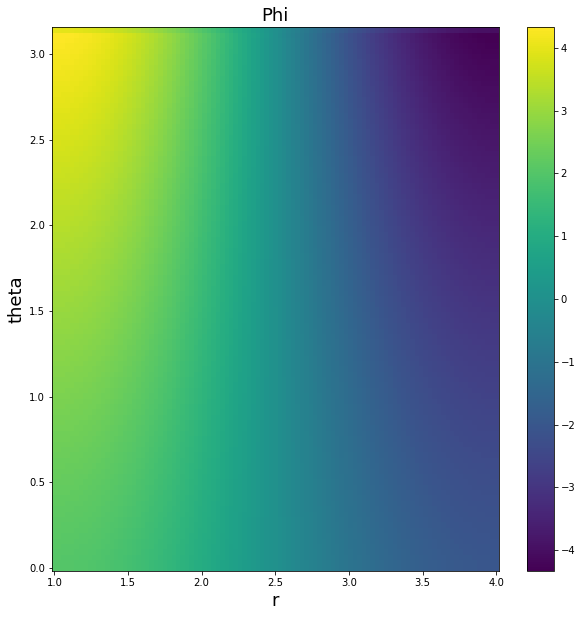

In [448]:
Plot(r, theta, w)

In [449]:
u, v, p = uvp(w)

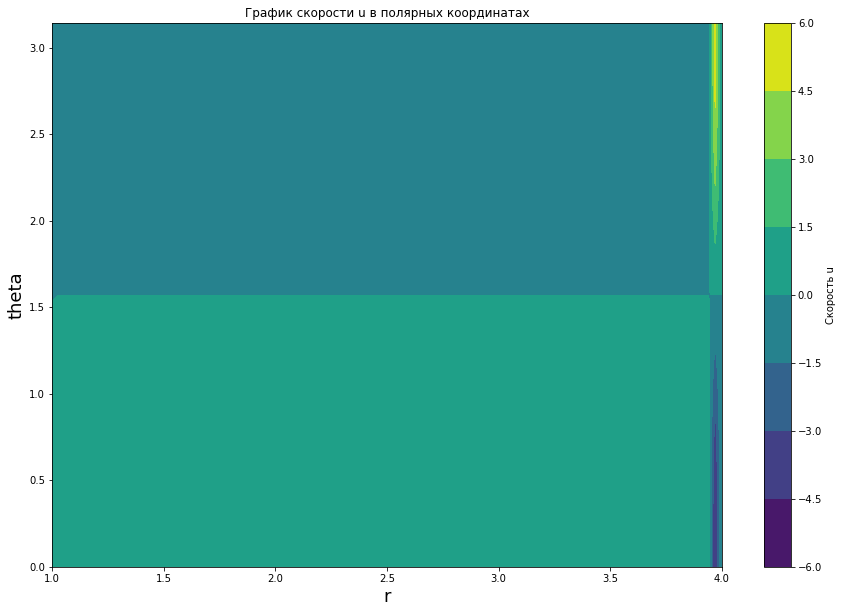

In [450]:
plot_u(u)

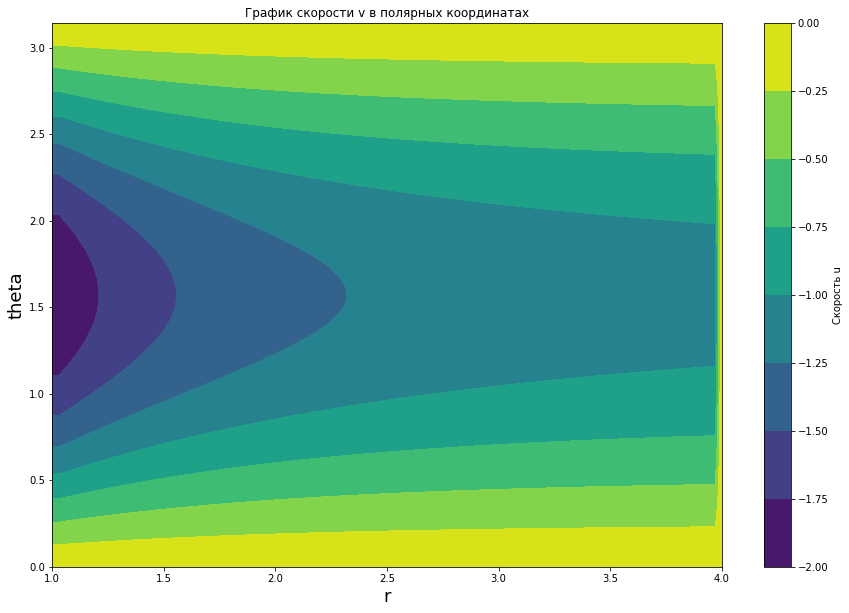

In [451]:
plot_v(v)

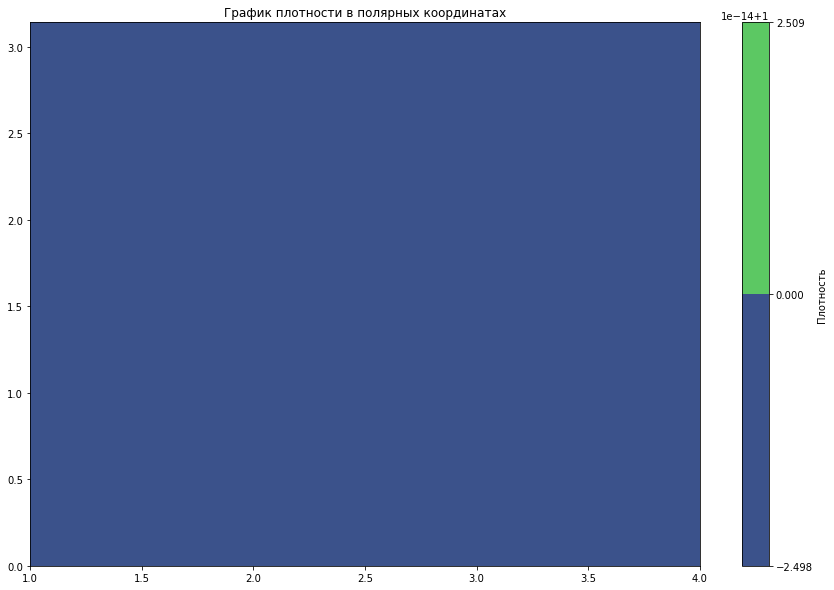

In [452]:
plot_p(p)

In [453]:
len(v)

101

In [454]:
# Главная программа
iter = 1  # Устанавливаем количество итераций
for itr in range(iter):
    B, D, oE, F, H = coeff(w)
    w = Wcal(w, B, D, F, H, oE)

In [455]:
u, v, p = uvp(w)

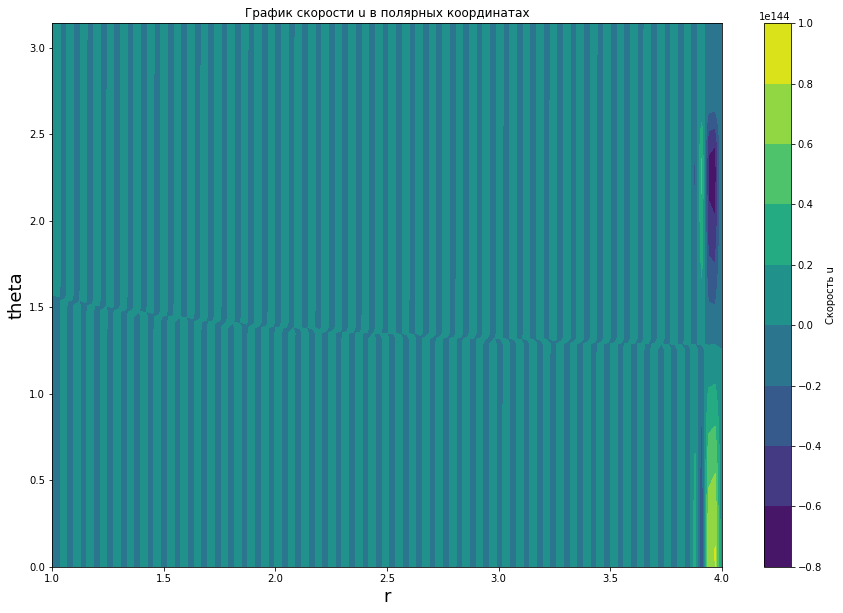

In [456]:
plot_u(u)

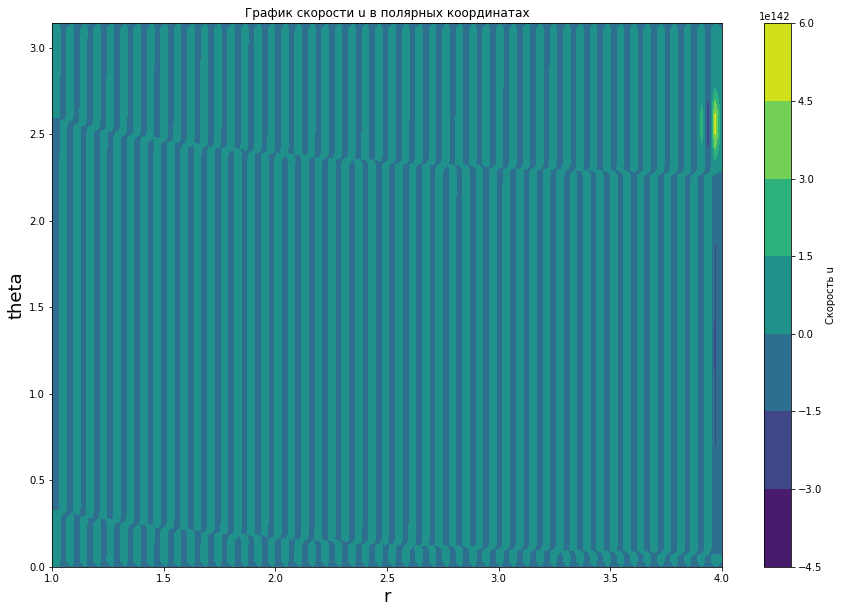

In [457]:
plot_u(v)

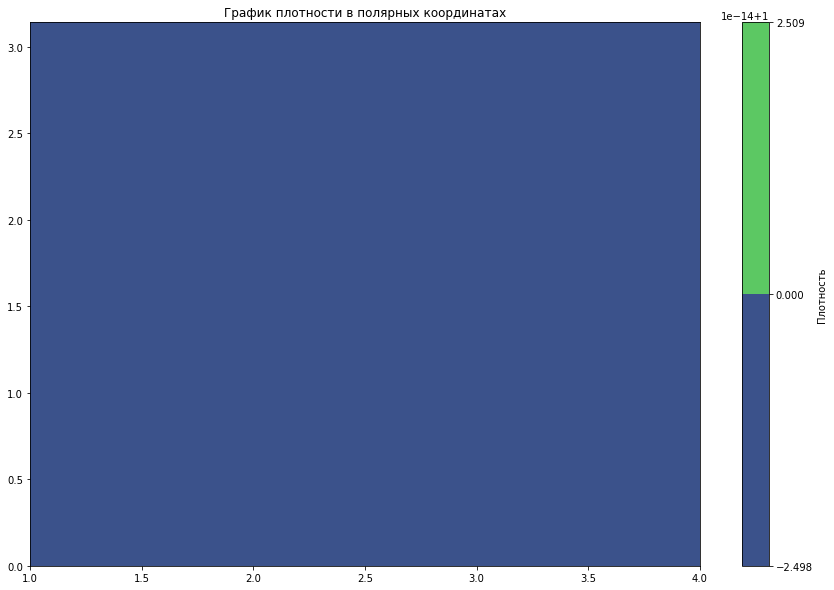

In [458]:
plot_p(p)